In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('trains.csv')
df = df.dropna()
df.head()

,Unnamed: 0,交易日期,市场类型,行业代码,证券代码,日个股回报率,行业回报率,日市场回报率(等权平均法),日市场回报率(流通市值加权平均法),日市场回报率(总市值加权平均法)
0,0,2016/1/4,1,A01,600108,-0.091281,-0.098048,-0.087405,-0.069008,-0.071377
1,1,2016/1/4,1,A01,600313,-0.098155,-0.098048,-0.087405,-0.069008,-0.071377
2,2,2016/1/4,1,A01,600598,-0.095723,-0.098048,-0.087405,-0.069008,-0.071377
3,3,2016/1/4,1,A01,601118,-0.099206,-0.098048,-0.087405,-0.069008,-0.071377
4,4,2016/1/4,1,A03,600975,-0.099941,-0.095190,-0.087405,-0.069008,-0.071377


In [3]:
features = ['行业回报率', '日市场回报率(流通市值加权平均法)'] # x Y: 日个股回报率

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X = df[features]
y = df['日个股回报率']

In [5]:
model.fit(X, y)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
predictions = predictions = model.predict(X)
df['preds'] = predictions
df.head()

,Unnamed: 0,交易日期,市场类型,行业代码,证券代码,日个股回报率,行业回报率,日市场回报率(等权平均法),日市场回报率(流通市值加权平均法),日市场回报率(总市值加权平均法),preds
0,0,2016/1/4,1,A01,600108,-0.091281,-0.098048,-0.087405,-0.069008,-0.071377,-0.097066
1,1,2016/1/4,1,A01,600313,-0.098155,-0.098048,-0.087405,-0.069008,-0.071377,-0.097066
2,2,2016/1/4,1,A01,600598,-0.095723,-0.098048,-0.087405,-0.069008,-0.071377,-0.097066
3,3,2016/1/4,1,A01,601118,-0.099206,-0.098048,-0.087405,-0.069008,-0.071377,-0.097066
4,4,2016/1/4,1,A03,600975,-0.099941,-0.095190,-0.087405,-0.069008,-0.071377,-0.094687


In [7]:
df['残差'] = df['日个股回报率'] - df['preds']
df.head()

,Unnamed: 0,交易日期,市场类型,行业代码,证券代码,日个股回报率,行业回报率,日市场回报率(等权平均法),日市场回报率(流通市值加权平均法),日市场回报率(总市值加权平均法),preds,残差
0,0,2016/1/4,1,A01,600108,-0.091281,-0.098048,-0.087405,-0.069008,-0.071377,-0.097066,0.005785
1,1,2016/1/4,1,A01,600313,-0.098155,-0.098048,-0.087405,-0.069008,-0.071377,-0.097066,-0.001089
2,2,2016/1/4,1,A01,600598,-0.095723,-0.098048,-0.087405,-0.069008,-0.071377,-0.097066,0.001343
3,3,2016/1/4,1,A01,601118,-0.099206,-0.098048,-0.087405,-0.069008,-0.071377,-0.097066,-0.002140
4,4,2016/1/4,1,A03,600975,-0.099941,-0.095190,-0.087405,-0.069008,-0.071377,-0.094687,-0.005254


In [8]:
df.to_csv('~/求残差pro.csv')

In [9]:
df['year'] = df['交易日期'].apply(lambda x: x[:4])
df.head()

,Unnamed: 0,交易日期,市场类型,行业代码,证券代码,日个股回报率,行业回报率,日市场回报率(等权平均法),日市场回报率(流通市值加权平均法),日市场回报率(总市值加权平均法),preds,残差,year
0,0,2016/1/4,1,A01,600108,-0.091281,-0.098048,-0.087405,-0.069008,-0.071377,-0.097066,0.005785,2016
1,1,2016/1/4,1,A01,600313,-0.098155,-0.098048,-0.087405,-0.069008,-0.071377,-0.097066,-0.001089,2016
2,2,2016/1/4,1,A01,600598,-0.095723,-0.098048,-0.087405,-0.069008,-0.071377,-0.097066,0.001343,2016
3,3,2016/1/4,1,A01,601118,-0.099206,-0.098048,-0.087405,-0.069008,-0.071377,-0.097066,-0.002140,2016
4,4,2016/1/4,1,A03,600975,-0.099941,-0.095190,-0.087405,-0.069008,-0.071377,-0.094687,-0.005254,2016


In [12]:
df_can = df.groupby(['证券代码', 'year'])['残差'].std()

In [13]:
df_can.to_csv('/Users/niufeiy/Downloads/cancha_pro.csv')

In [14]:
len(df)

1128079

In [21]:
df_guodu = pd.read_csv('/Users/niufeiy/Downloads/去空5年/投资过度-表格 1.csv')
df_buzu = pd.read_csv('/Users/niufeiy/Downloads/去空5年/投资不足-表格 1.csv')

df_guodu['year'] = df_guodu['会计年度'].apply(lambda x: str(x)[:4])
df_buzu['year'] = df_buzu['会计年度'].apply(lambda x: str(x)[:4])
df_guodu.head()

,股票代码,会计年度,残差,eu,eusq,std,高管薪酬,mat-1,总资产增长率A'-1,sale-1,...,C29,C21,C19,C14,C31,C42,L,行业代码,Unnamed: 64,year
0,16,2017-12-31,0.130943,-0.153612,2.733726,0.012132,15.434324,0.01,0.210012,1.18,...,0,0,0,0,0,0,0,C39,NaN,2017
1,27,2013-12-31,0.067666,-0.056220,2.421156,0.013612,14.753015,0.32,0.026980,0.40,...,0,0,0,0,0,0,0,D,NaN,2013
2,27,2014-12-31,0.110023,-0.004030,2.261463,0.013416,14.794851,0.18,0.031963,0.37,...,0,0,0,0,0,0,0,D,NaN,2014
3,27,2015-12-31,0.144226,0.087668,1.994077,0.040703,14.988705,0.18,0.151164,0.33,...,0,0,0,0,0,0,0,D,NaN,2015
4,27,2017-12-31,0.243632,0.010171,2.218955,0.010353,14.888326,0.46,0.048130,0.19,...,0,0,0,0,0,0,0,D,NaN,2017


In [25]:
df_guodu.set_index(['股票代码', 'year'], inplace=True)
df_buzu.set_index(['股票代码', 'year'], inplace=True)
df_buzu.head()

会计年度        残差          eu          eusq       std  \
股票代码 year                                                             
16   2013  2013-12-31 -0.084330   -0.111520      2.596310  0.017779   
     2014  2014-12-31 -0.180915   -0.080176      2.496280  0.014589   
     2015  2015-12-31 -0.228656   -0.053656      2.413183  0.026290   
     2016  2016-12-31 -0.249976   -0.058870      2.429408  0.022258   
25   2013  2013-12-31 -0.436004  181.424068  32372.747106  0.017394   

                高管薪酬  mat-1  总资产增长率A'-1  sale-1  cash-1  ...   C40  C38  C29  \
股票代码 year                                                ...                   
16   2013  14.648420   0.03   -0.020320    1.11    0.10  ...     0    0    0   
     2014  14.957182   0.00   -0.049486    1.27    0.12  ...     0    0    0   
     2015  15.451162   0.08    0.065755    1.16    0.10  ...     0    0    0   
     2016  15.160280   0.00   -0.150720    1.29    0.12  ...     0    0    0   
25   2013  14.363112   0.35    0.130049    0.65    0.09  ...     0    0    0   

           C21  C19  C14  C31  C42  L  行业代码  
股票代码 year                                    
16   2013    0    0    0    0    0  0   C39  
     2014    0    0    0    0    0  0   C39  
     2015    0    0    0    0    0  0   C39  
     2016    0    0    0    0    0  0   C39  
25   2013    0    0    0    0    0  0     F  

[5 rows x 63 columns]

In [26]:
df_buzu['残差_100wan'] = df_can

In [27]:
df_guodu['残差_100wan'] = df_can

In [28]:
df_buzu.to_csv('/Users/niufeiy/Downloads/buzu.csv')
df_guodu.to_csv('/Users/niufeiy/Downloads/guodu.csv')


In [15]:
from sklearn import datasets
boston = datasets.load_boston()

In [16]:
import warnings # 用来忽略seaborn绘图库产生的warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
%matplotlib inline

In [17]:
def skdata2df(skdata):
    dfdata = pd.DataFrame(skdata.data,columns=skdata.feature_names)
    dfdata["target"] = skdata.target
    return dfdata
bs = skdata2df(boston)
bs.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


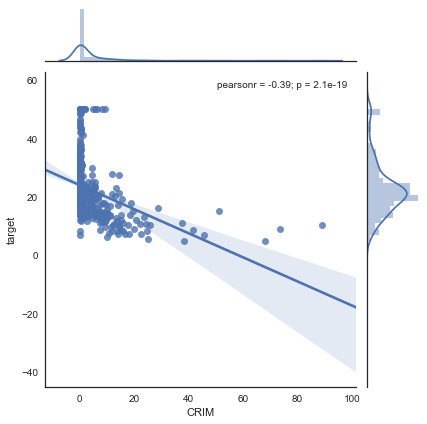

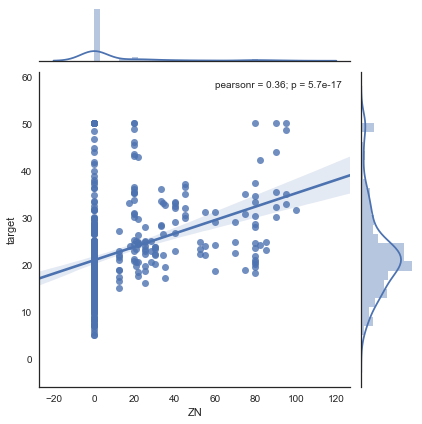

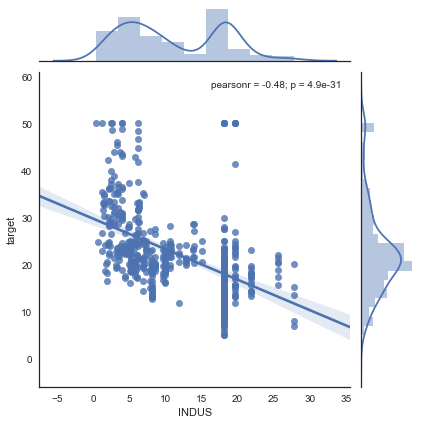

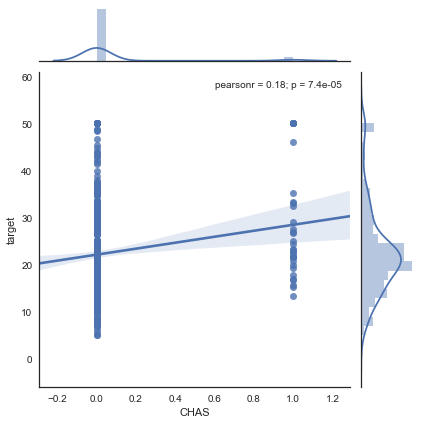

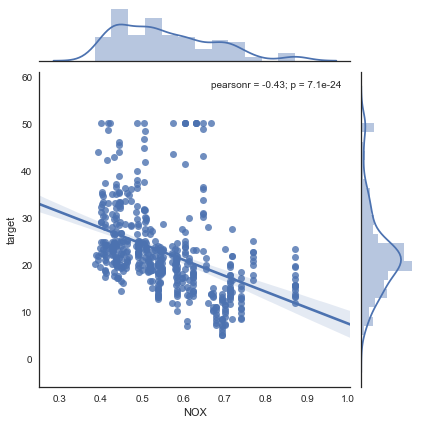

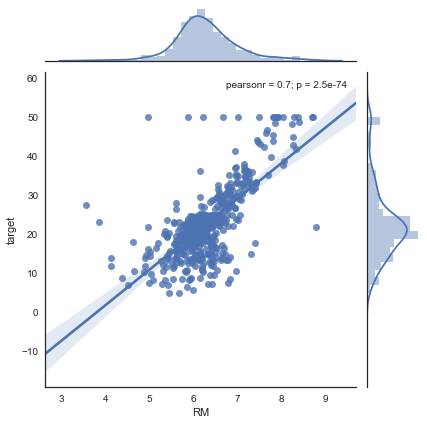

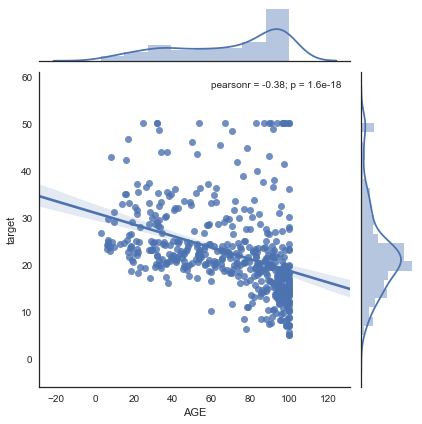

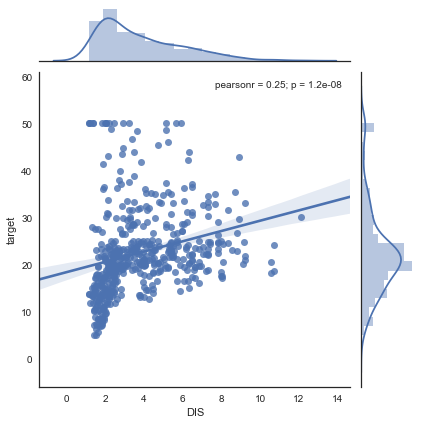

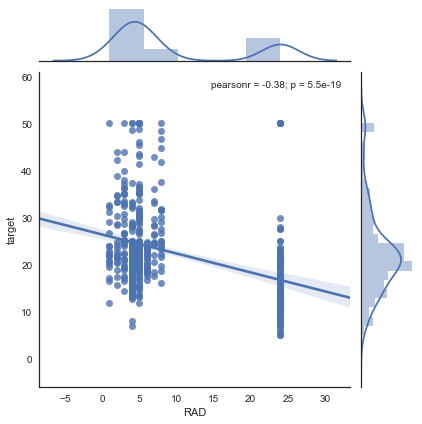

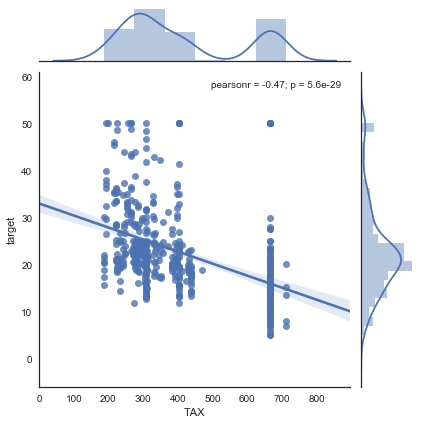

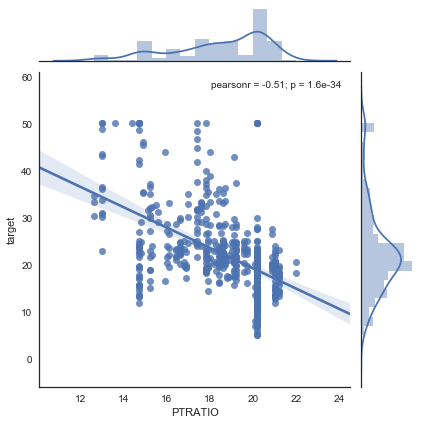

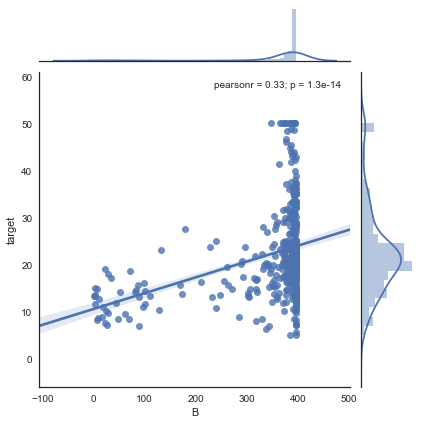

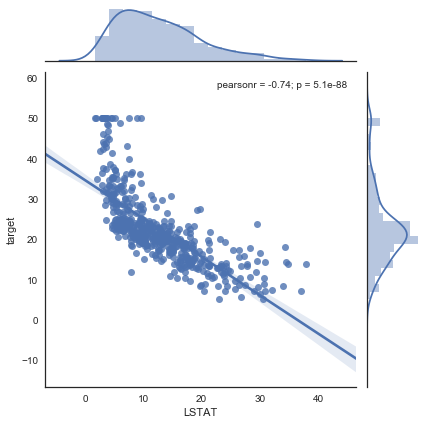

In [26]:
fig = plt.figure()
for i,f in enumerate(boston.feature_names):
    sns.jointplot(x=f, y="target", data=bs, kind='reg', size=6)

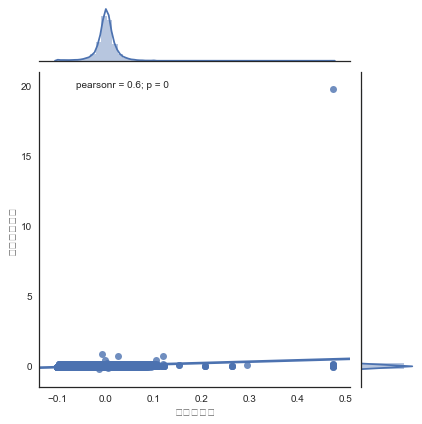

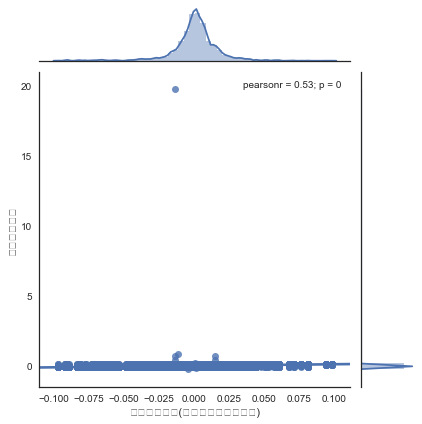

In [27]:
fig = plt.figure()
for i,f in enumerate(features):
    sns.jointplot(x=f, y="日个股回报率", data=df, kind='reg', size=6)

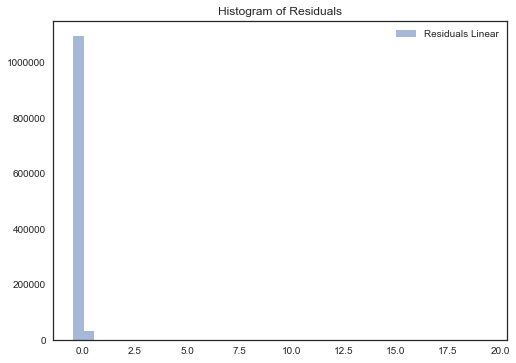

In [28]:
from matplotlib import pyplot as plt
f, ax = plt.subplots(figsize=(7, 5))
f.tight_layout()
ax.hist(df['日个股回报率'] - predictions,bins=40, label='Residuals Linear', color='b', alpha=.5);
ax.set_title("Histogram of Residuals")
ax.legend(loc='best');